In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Get the current working directory
script_dir = os.getcwd()
parent_dir = os.path.join(script_dir, '..')
sys.path.insert(0, parent_dir)

from process import *

displaying shape Information
(70000, 13)
Displaying head of Dataset:
    id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0    0  18393       2     168    62.0    110     80            1     1      0   
1    1  20228       1     156    85.0    140     90            3     1      0   
2    2  18857       1     165    64.0    130     70            3     1      0   
3    3  17623       2     169    82.0    150    100            1     1      0   
4    4  17474       1     156    56.0    100     60            1     1      0   
5    8  21914       1     151    67.0    120     80            2     2      0   
6    9  22113       1     157    93.0    130     80            3     1      0   
7   12  22584       2     178    95.0    130     90            3     3      0   
8   13  17668       1     158    71.0    110     70            1     1      0   
9   14  19834       1     164    68.0    110     60            1     1      0   
10  15  22530       1     169    80.0   

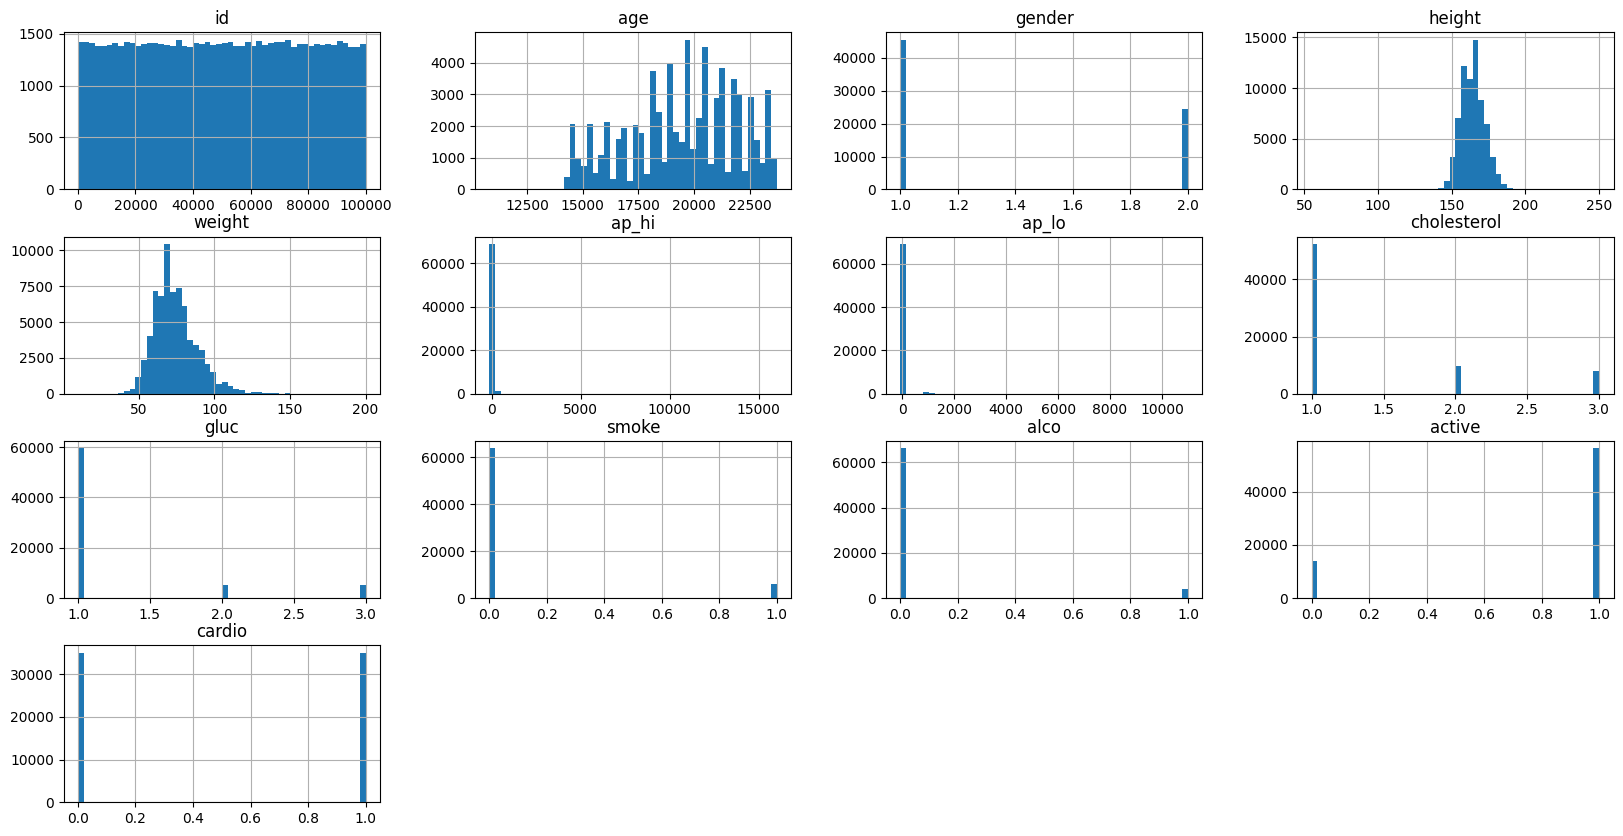

Box Plotting


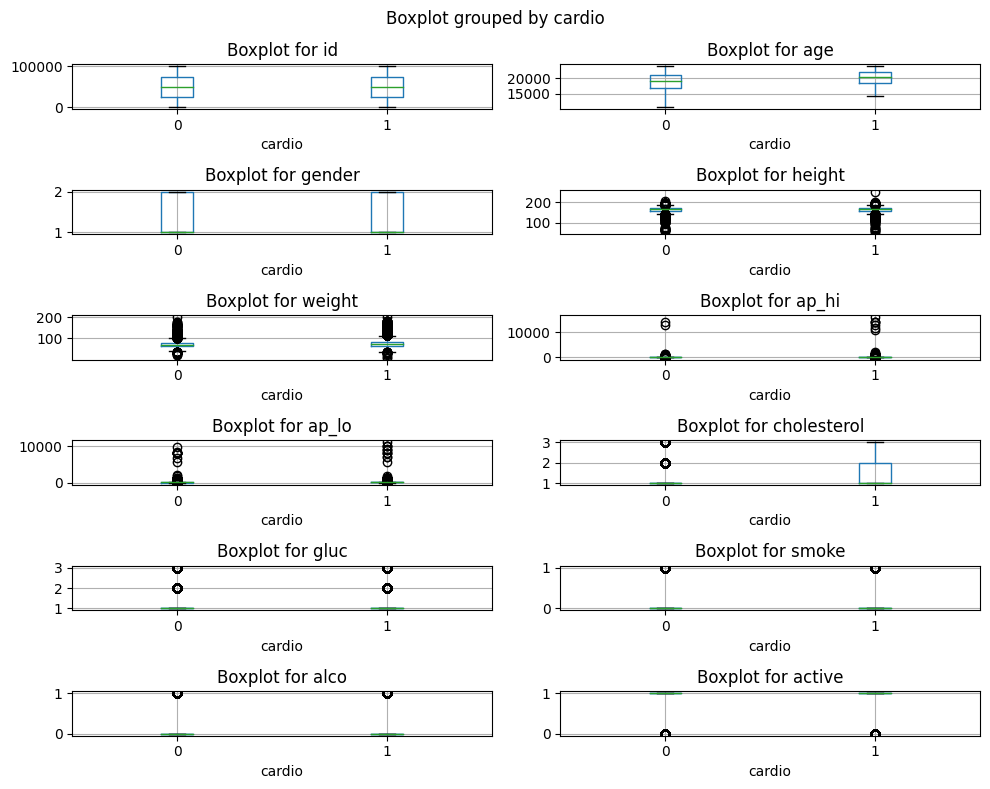

Droping ID column
Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')
Correlation
age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
cardio         1.000000
Name: cardio, dtype: float64


In [2]:
cardio_data = read_file('/Users/castekcu/Documents/MachineLearning/Cardio/cardio_train.csv')
showInfo(cardio_data, tail=5)
print("PLotting histograms of Cardio Dataset")
cardio_data.hist(figsize=(20, 10), bins=50)
plt.show()
print("Box Plotting")
box_plotting(cardio_data, by_='cardio')
print("Droping ID column")
cardio_data = cardio_data.drop('id', axis=1)
print(cardio_data.columns)
print("Correlation")
corr_matrix = cardio_data.corr()
print(corr_matrix['cardio'])


In [3]:
#Let's makke more data observations
for i in range(cardio_data.shape[0]):
    if cardio_data['gender'][i] == 2:
        cardio_data['gender'][i] = 0
features_observed = ['alco', 'smoke', 'active', 'gender']
grouped_data = {}

for feature in features_observed:
    grouped_data[feature] = {
        'active': cardio_data[cardio_data[feature] == 1]['cardio'].tolist(),
        'inactive': cardio_data[cardio_data[feature] == 0]['cardio'].tolist()
    }

/var/folders/y8/hct1kzsx4c1_tkbbd7lj2dhh0000gn/T/ipykernel_1379/1362842282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_data['gender'][i] = 0


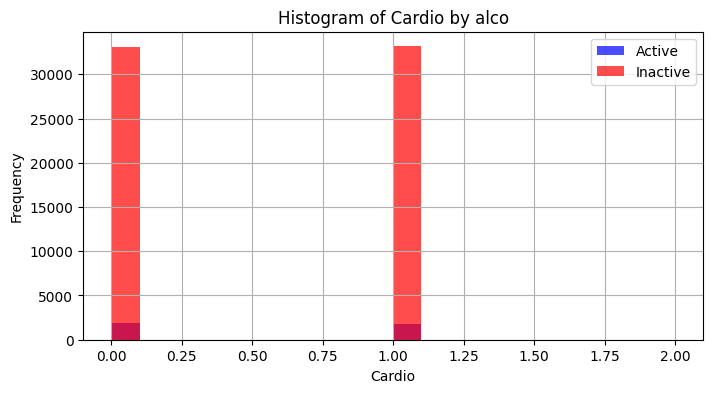

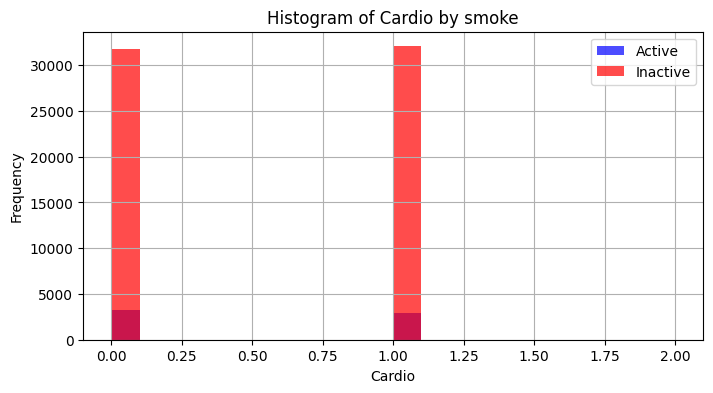

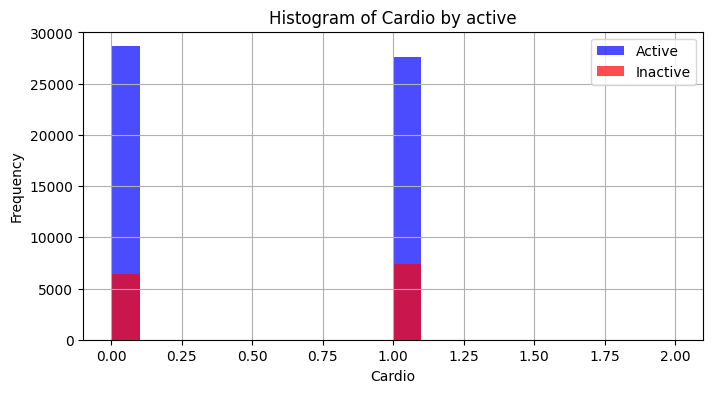

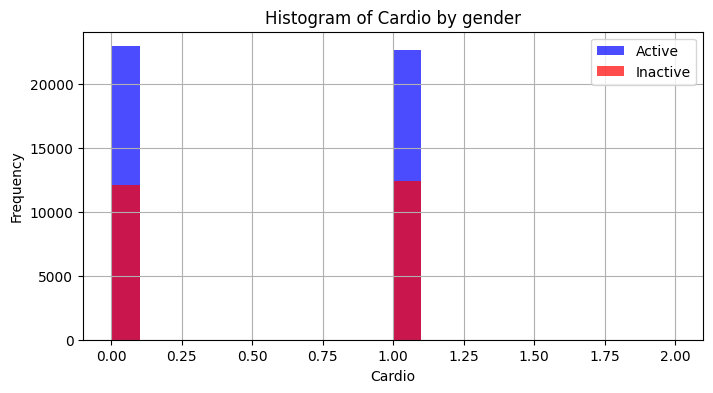

In [4]:
import matplotlib.pyplot as plt

# Loop through the observed features and plot histograms
for feature in features_observed:
    active_data = grouped_data[feature]['active']
    inactive_data = grouped_data[feature]['inactive']

    # Create subplots for each feature
    plt.figure(figsize=(8, 4))
    
    # Plot histograms with customizations
    plt.hist(active_data, bins=20, alpha=0.7, label='Active', color='blue', range=(0, 2))
    plt.hist(inactive_data, bins=20, alpha=0.7, label='Inactive', color='red', range=(0, 2))
    
    plt.xlabel('Cardio')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Cardio by {feature}')
    plt.legend(loc='best')
    
    # Add gridlines
    plt.grid(True)
    
    plt.show()


In [5]:
from collections import Counter

# Dictionary to store counts for each feature
feature_counts = {}

# Loop through the observed features
for feature in features_observed:
    active_data = grouped_data[feature]['active']
    inactive_data = grouped_data[feature]['inactive']

    # Count the number of sick (cardio = 1) people in each group
    active_counts = Counter(active_data)
    inactive_counts = Counter(inactive_data)

    # Store the counts in the feature_counts dictionary
    feature_counts[feature] = {
        'active_sick_count': active_counts[1],
        'inactive_sick_count': inactive_counts[1]
    }

# Print the counts for each feature
for feature, counts in feature_counts.items():
    print(f"Feature: {feature}")
    print(f"Active Sick Count: {counts['active_sick_count']}")
    print(f"Inactive Sick Count: {counts['inactive_sick_count']}")
    print("---")


Feature: alco
Active Sick Count: 1823
Inactive Sick Count: 33156
---
Feature: smoke
Active Sick Count: 2929
Inactive Sick Count: 32050
---
Feature: active
Active Sick Count: 27618
Inactive Sick Count: 7361
---
Feature: gender
Active Sick Count: 22616
Inactive Sick Count: 12363
---


In [6]:
# Dictionary to store proportions for each feature
feature_proportions = {}

# Loop through the observed features
for feature in features_observed:
    active_data = grouped_data[feature]['active']
    inactive_data = grouped_data[feature]['inactive']

    # Count the number of people in each group
    total_active = len(active_data)
    total_inactive = len(inactive_data)

    # Count the number of sick (cardio = 1) people in each group
    active_sick_count = sum(active_data)
    inactive_sick_count = sum(inactive_data)

    # Calculate proportions (percentage) of sick individuals in each group
    active_sick_proportion = (active_sick_count / total_active) * 100 if total_active > 0 else 0
    inactive_sick_proportion = (inactive_sick_count / total_inactive) * 100 if total_inactive > 0 else 0

    # Store the proportions in the feature_proportions dictionary
    feature_proportions[feature] = {
        'active_sick_proportion': active_sick_proportion,
        'inactive_sick_proportion': inactive_sick_proportion
    }

# Print the proportions for each feature and group
for feature, proportions in feature_proportions.items():
    print(f"Feature: {feature}")
    print(f"Active Sick Proportion: {proportions['active_sick_proportion']:.2f}%")
    print(f"Inactive Sick Proportion: {proportions['inactive_sick_proportion']:.2f}%")
    print("---")


Feature: alco
Active Sick Proportion: 48.43%
Inactive Sick Proportion: 50.06%
---
Feature: smoke
Active Sick Proportion: 47.48%
Inactive Sick Proportion: 50.21%
---
Feature: active
Active Sick Proportion: 49.09%
Inactive Sick Proportion: 53.58%
---
Feature: gender
Active Sick Proportion: 49.67%
Inactive Sick Proportion: 50.52%
---


In [7]:
#In these cases theses data may not impact the results but they a very importants factor of risk of having cardio disease so we will keep them

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
cardio_outcome = cardio_data['cardio'].copy()
cardio_train_set = cardio_data.drop(['cardio', 'smoke', 'active'], axis=1)
cardio_train_set, cardio_test_Set, cardio_outcome_train, cardio_outcome_test = train_test_split(cardio_train_set, cardio_outcome, test_size=0.2, random_state=42)


In [9]:
from model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [10]:
models = {
    'Logistic Regression': LogisticRegression(num_iterations=10000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
results_df = pd.DataFrame(columns=['Model', 'Accuracy'])
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(cardio_train_set, cardio_outcome_train)
    y_pred = model.predict(cardio_test_Set)
    accuracy = accuracy_score(cardio_outcome_test, y_pred)
    print(model_name, accuracy)


Training:   0%|          | 0/10000 [00:00<?, ?iteration/s]

Training:  27%|██▋       | 2692/10000 [00:17<00:46, 158.38iteration/s]

Using Neural Network

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

2023-09-14 17:23:32.821101: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model = keras.Sequential([
    layers.Input(shape=(cardio_train_set.shape[1],)),  # Input shape based on the number of features
    layers.Dense(200, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(cardio_train_set, cardio_outcome_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
5040/5040 [==============================] - 10s 2ms/step - loss: 22.3749 - accuracy: 0.5166 - val_loss: 3.6483 - val_accuracy: 0.4975
Epoch 2/10
5040/5040 [==============================] - 9s 2ms/step - loss: 2.4630 - accuracy: 0.5582 - val_loss: 2.2236 - val_accuracy: 0.5102
Epoch 3/10
5040/5040 [==============================] - 9s 2ms/step - loss: 0.8952 - accuracy: 0.5804 - val_loss: 0.6480 - val_accuracy: 0.6943
Epoch 4/10
5040/5040 [==============================] - 10s 2ms/step - loss: 0.6923 - accuracy: 0.5462 - val_loss: 0.6933 - val_accuracy: 0.5014
Epoch 5/10
5040/5040 [==============================] - 10s 2ms/step - loss: 0.7050 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 6/10
5040/5040 [==============================] - 10s 2ms/step - loss: 0.6942 - accuracy: 0.4975 - val_loss: 0.6943 - val_accuracy: 0.5004
Epoch 7/10
5040/5040 [==============================] - 10s 2ms/step - loss: 0.6942 - accuracy: 0.4982 - val_loss: 0.6932 - val_acc

In [ ]:
import keras_tuner as kt

In [ ]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=300)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log") 
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"]) 
    if optimizer == "sgd": 
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate) 
    else: 
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate) 
        
    model = keras.Sequential() 
    model.add(keras.layers.Flatten()) 
    for _ in range(n_hidden): 
        model.add(keras.layers.Dense(n_neurons, activation="relu")) 
    model.add(keras.layers.Dense(1, activation="sigmoid")) 
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"]) 
    return model

In [ ]:
import os
from pathlib import Path

# Define the directory in your home folder
home_directory = str(Path.home())
tuner_directory = os.path.join(home_directory, 'my_cardio_training')

# Create the tuner with the updated directory
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=10, overwrite=True,
    directory=tuner_directory,
    project_name="my_rnd_search", seed=42)

# Continue with the search as before
random_search_tuner.search(cardio_train_set, cardio_outcome_train, epochs=10, validation_split=0.2)


Trial 10 Complete [00h 00m 30s]
val_accuracy: 0.6025000214576721

Best val_accuracy So Far: 0.7044642567634583
Total elapsed time: 00h 06m 47s
INFO:tensorflow:Oracle triggered exit


In [ ]:
#Let's get best hyperparemeters values and enhance them
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 4,
 'n_neurons': 85,
 'learning_rate': 0.00905127409782462,
 'optimizer': 'adam'}

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Define the hyperparameters
n_hidden = 4
n_neurons = 85
learning_rate = 0.00905127409782462
optimizer = 'adam'

# Create a new Keras model with the specified hyperparameters
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(cardio_train_set.shape[1],)))  # Replace 'input_shape' with your actual input shape
for _ in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 9)                 0         
                                                                 
 dense_1 (Dense)             (None, 85)                850       
                                                                 
 dense_2 (Dense)             (None, 85)                7310      
                                                                 
 dense_3 (Dense)             (None, 85)                7310      
                                                                 
 dense_4 (Dense)             (None, 85)                7310      
                                                                 
 dense_5 (Dense)             (None, 1)                 86        
                                                                 
Total params: 22866 (89.32 KB)
Trainable params: 22866